# Machine Learning Examples

This Jupyter Notebook provides three introductory Python examples for Machine Learning (ML) tasks. We'll cover:
1.  **PyTorch**: Simple Linear Regression
2.  **TensorFlow**: Simple Neural Network for Classification
3.  **OpenAI API**: Asking a static question to GPT-4o

Each example is broken down into steps with explanations tailored for those new to ML engineering and with a basic understanding of Python. We will also explore the "Practice Variations" suggested in the source document.

## Environment & Dependencies

This notebook is designed to be run in a Python 3 environment. The examples use common ML libraries.

**OS & GPU Context:**
While these examples can run on various operating systems, this notebook was created with **Ubuntu 22.04** and an **NVIDIA RTX 3090 (24GB VRAM)** in mind. For PyTorch and TensorFlow, having a compatible NVIDIA GPU and the necessary CUDA drivers installed will allow for GPU acceleration, which can significantly speed up training for larger models. However, these specific examples are small enough to run efficiently on a CPU as well.

**Installation:**
You can install the necessary libraries using pip. Open your terminal or command prompt and run:
```bash
pip install torch torchvision torchaudio tensorflow scikit-learn openai numpy matplotlib
```
*(Note: `matplotlib` is added for potential visualizations, though not strictly required by the base examples.)*

Ensure your Python environment is set up correctly before proceeding. For GPU support with PyTorch and TensorFlow, you might need to install specific versions compatible with your CUDA toolkit. Please refer to their official installation guides for detailed instructions.

## Checking GPU Availability Using both PyTorch and TensorFlow

### PyTorch Test
#### Output should look similiar to the below depending on your GPU(s)
```bash
PyTorch CUDA version: 12.6
PyTorch cuDNN version: 90800
Number of GPUs available: 2

GPU 0:
  Name: NVIDIA GeForce RTX 3090
  Total Memory: 25.21 GB
  Compute Capability: 8.6

GPU 1:
  Name: NVIDIA GeForce RTX 3090
  Total Memory: 25.21 GB
  Compute Capability: 8.6
```

In [1]:
import torch

if torch.cuda.is_available():
    print(f"PyTorch CUDA version: {torch.version.cuda}")
    print(f"PyTorch cuDNN version: {torch.backends.cudnn.version()}")
    gpu_count = torch.cuda.device_count()
    print(f"Number of GPUs available: {gpu_count}")
    for i in range(gpu_count):
        print(f"\nGPU {i}:")
        print(f"  Name: {torch.cuda.get_device_name(i)}")
        props = torch.cuda.get_device_properties(i)
        print(f"  Total Memory: {props.total_memory/1e9:.2f} GB")  # Convert bytes to GB
        print(f"  Compute Capability: {props.major}.{props.minor}")
else:
    print("PyTorch: CUDA is not available.")

PyTorch CUDA version: 12.6
PyTorch cuDNN version: 90800
Number of GPUs available: 2

GPU 0:
  Name: NVIDIA GeForce RTX 3090
  Total Memory: 25.21 GB
  Compute Capability: 8.6

GPU 1:
  Name: NVIDIA GeForce RTX 3090
  Total Memory: 25.21 GB
  Compute Capability: 8.6


TensorFlow 
#### Output should look like:
```bash
2025-05-11 20:50:25.015083: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-11 20:50:25.020710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
E0000 00:00:1747011025.027882   13580 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747011025.030095   13580 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-11 20:50:25.037501: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
TensorFlow version: 2.18.0
TensorFlow is using 2 GPU(s).
TensorFlow built with CUDA version: 12.6
TensorFlow built with cuDNN version: 9
```
#### Output explanation:
1. The run logs show that TensorFlow is now imported successfully and is running using 2 GPUs. The lines about registering cuFFT, cuDNN, and cuBLAS are warnings that arise when TensorFlow detects that these libraries have already been registered. They are expected in multi‐GPU environments and do not indicate a critical error.
2. If you prefer to suppress these verbose logs, you can set the environment variable TF_CPP_MIN_LOG_LEVEL to 2 before importing TensorFlow.

    ```python
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING messages from TensorFlow
    ```

In [2]:
try:
    import tensorflow as tf
except ModuleNotFoundError:
    print("Error: tensorflow module not found. Please install it via 'pip install tensorflow'")
    raise

print(f"TensorFlow version: {tf.__version__}")
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f"TensorFlow is using {len(gpu_devices)} GPU(s).")
    # Report build info
    build_info = tf.sysconfig.get_build_info()
    print(f"TensorFlow built with CUDA version: {build_info.get('cuda_version', 'N/A')}")
    print(f"TensorFlow built with cuDNN version: {build_info.get('cudnn_version', 'N/A')}")
    
    # List logical GPU devices
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(f"Number of Logical GPUs: {len(logical_gpus)}")

    # Print each physical GPU only once with improved formatting
    for idx, gpu in enumerate(gpu_devices):
        print(f"\n--- GPU {idx} Info ---")
        # Show physical device name if available; otherwise mark as Unknown.
        device_name = gpu.name if gpu.name.strip() else "Unknown"
        print(f"Physical Device: {device_name}")
        details = tf.config.experimental.get_device_details(gpu)
        if details.get('device_name'):
            print(f"Detailed Name: {details['device_name']}")
        try:
            mem_info = tf.config.experimental.get_memory_info(gpu.name)
            current_mem = mem_info.get('current', 0) / 1e6  # Convert bytes to MB
            peak_mem = mem_info.get('peak', 0) / 1e6           # Convert bytes to MB
            print(f"Memory: Current Usage = {current_mem:.2f} MB, Peak = {peak_mem:.2f} MB")
        except Exception:
            print("Memory info not available.")
else:
    print("TensorFlow: No GPU devices found.")

2025-05-22 19:49:22.926197: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 19:49:22.931600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747957762.938506   45221 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747957762.940617   45221 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 19:49:22.947887: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

TensorFlow version: 2.18.0
TensorFlow is using 2 GPU(s).
TensorFlow built with CUDA version: 12.6
TensorFlow built with cuDNN version: 9
Number of Logical GPUs: 2

--- GPU 0 Info ---
Physical Device: /physical_device:GPU:0
Detailed Name: NVIDIA GeForce RTX 3090
Memory info not available.

--- GPU 1 Info ---
Physical Device: /physical_device:GPU:1
Detailed Name: NVIDIA GeForce RTX 3090
Memory info not available.
Number of Logical GPUs: 2

--- GPU 0 Info ---
Physical Device: /physical_device:GPU:0
Detailed Name: NVIDIA GeForce RTX 3090
Memory info not available.

--- GPU 1 Info ---
Physical Device: /physical_device:GPU:1
Detailed Name: NVIDIA GeForce RTX 3090
Memory info not available.


I0000 00:00:1747957764.496165   45221 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19850 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1747957764.498553   45221 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22239 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:02:00.0, compute capability: 8.6


## 1. PyTorch Example: Simple Linear Regression

This example demonstrates how to build a basic linear regression model using PyTorch. Linear regression is a fundamental algorithm in machine learning used to model the linear relationship between a dependent variable (y) and one or more independent variables (x). Our goal is to predict `y = 2x + 1` based on some generated data with a bit of noise.

### 1.1 Importing Libraries

First, we import the necessary libraries:
-   `torch`: The main PyTorch library.
-   `torch.nn`: A submodule in PyTorch that contains building blocks for creating neural networks (like layers, loss functions, etc.). `nn` stands for Neural Network.
-   `numpy`: A popular library for numerical computations in Python, often used for creating and manipulating arrays (which we'll convert to PyTorch tensors).

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt # For plotting

### 1.2 Generating Synthetic Data

We need data to train our model. Since we want to model `y = 2x + 1`, we'll generate some `x` values and calculate the corresponding `y` values, adding a small amount of random noise to make it more realistic.

-   `np.linspace(0, 10, 100)`: Creates 100 evenly spaced numbers between 0 and 10. This will be our `x`, which leads to ≈0.10101 steps, not 0.1
-   `.reshape(-1, 1)`: Changes the shape of `x` to be a 2D array with 100 rows and 1 column. PyTorch models usually expect inputs in this format.
-   `astype(np.float32)`: Converts the data type to 32-bit floating point numbers, which is standard for PyTorch tensors.
-   `y = 2 * x + 1 + np.random.normal(0, 0.1, x.shape)`: Calculates `y` using our linear equation and adds some Gaussian noise (mean 0, standard deviation 0.1).

Step 1: x_numpy (first 5 values): [[0.       ]
 [0.1010101]
 [0.2020202]
 [0.3030303]
 [0.4040404]]
Step 2: y (without noise) (first 5 values): [[1.       ]
 [1.2020202]
 [1.4040403]
 [1.6060606]
 [1.8080808]]
Step 3: noise (first 5 values): [[-0.10618787]
 [-0.03148528]
 [-0.26309675]
 [ 0.08435109]
 [-0.0132124 ]]
Final y_numpy (first 5 values): [[0.8938121]
 [1.1705348]
 [1.1409435]
 [1.6904117]
 [1.7948684]]


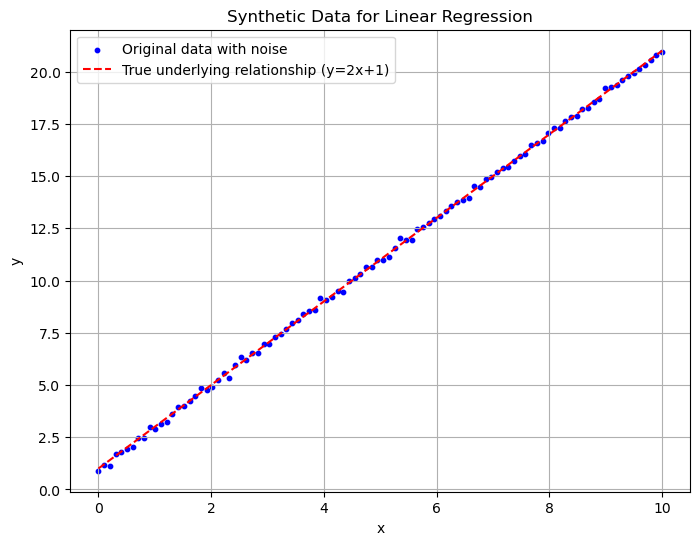

In [4]:
# Generate synthetic data
x_numpy = np.linspace(0, 10, 100).reshape(-1, 1).astype(np.float32)
print("Step 1: x_numpy (first 5 values):", x_numpy[:5])

y_no_noise = 2 * x_numpy + 1
print("Step 2: y (without noise) (first 5 values):", y_no_noise[:5])

noise = np.random.normal(0, 0.1, x_numpy.shape).astype(np.float32)
print("Step 3: noise (first 5 values):", noise[:5])

y_numpy = y_no_noise + noise
print("Final y_numpy (first 5 values):", y_numpy[:5])

# Let's visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(x_numpy, y_numpy, label='Original data with noise', color='blue', s=10) # s is marker size
plt.plot(x_numpy, 2 * x_numpy + 1, label='True underlying relationship (y=2x+1)', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

### 1.3 Converting Data to PyTorch Tensors

PyTorch models work with PyTorch tensors, not NumPy arrays directly. So, we convert our NumPy arrays `x_numpy` and `y_numpy` into tensors.

-   `torch.from_numpy()`: This function does the conversion.

In [5]:
# Convert to PyTorch tensors
x_tensor = torch.from_numpy(x_numpy)
y_tensor = torch.from_numpy(y_numpy)

print(f"Shape of x_tensor: {x_tensor.shape}")
print(f"Shape of y_tensor: {y_tensor.shape}")

Shape of x_tensor: torch.Size([100, 1])
Shape of y_tensor: torch.Size([100, 1])


### 1.4 Defining the Linear Regression Model

We define our model as a Python class that inherits from `nn.Module`. This is the standard way to create models in PyTorch.

-   `__init__(self)`: The constructor. Here, we define the layers of our model. 
    -   `super(LinearRegression, self).__init__()`: Calls the constructor of the parent class (`nn.Module`). This is necessary.
    -   `self.linear = nn.Linear(1, 1)`: This creates a linear layer. 
        -   The first `1` means the input to this layer has 1 feature (our `x` value).
        -   The second `1` means the output of this layer has 1 feature (our predicted `y` value).
        -   This layer will learn a weight (slope) and a bias (intercept) for the equation `y = weight * x + bias`.
-   `forward(self, x)`: This method defines how the input `x` flows through the model to produce an output. Here, it simply passes `x` through our linear layer.

In [6]:
# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Input features: 1 (x), Output features: 1 (y_predicted)
        self.linear = nn.Linear(in_features=1, out_features=1)
      
    def forward(self, x):
        # This defines the computation performed at every call.
        return self.linear(x)

### 1.5 Initializing Model, Loss Function, and Optimizer

-   **Model**: `model = LinearRegressionModel()`: We create an instance of our model class.
-   **Loss Function**: `criterion = nn.MSELoss()`: The loss function measures how different our model's predictions are from the actual `y` values. 
    -   `MSELoss` stands for Mean Squared Error. It calculates the average of the squares of the differences between predictions and actual values. This is a common loss function for regression tasks.
-   **Optimizer**: `optimizer = torch.optim.SGD(model.parameters(), lr=0.01)`: The optimizer is responsible for updating the model's parameters (weights and biases) to minimize the loss.
    -   `torch.optim.SGD`: Stochastic Gradient Descent. A common optimization algorithm.
    -   `model.parameters()`: Tells the optimizer which parameters (weights and biases of our `self.linear` layer) it needs to update.
    -   `lr=0.01`: Learning rate. This controls how big the steps are when updating parameters. A smaller learning rate means smaller steps and potentially longer training, but can be more stable. A larger learning rate can speed up training but might overshoot the optimal values.

In [7]:
# Initialize model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Stochastic Gradient Descent

### 1.6 Training Loop

This is where the model learns. We repeat the process for a certain number of `epochs`. An epoch is one complete pass through the entire training dataset.

Inside the loop:
1.  `y_pred = model(x_tensor)`: Forward pass. Get predictions from the model using the current `x_tensor`.
2.  `loss = criterion(y_pred, y_tensor)`: Calculate the loss by comparing the predictions (`y_pred`) with the actual values (`y_tensor`).
3.  `optimizer.zero_grad()`: Clear old gradients. Gradients are values that indicate the direction to adjust parameters to reduce loss. We need to clear them before calculating new ones for the current step, otherwise they accumulate.
4.  `loss.backward()`: Backward pass. Calculate the gradients of the loss with respect to the model's parameters. This is where PyTorch's automatic differentiation (autograd) shines.
5.  `optimizer.step()`: Update parameters. The optimizer adjusts the model's parameters using the calculated gradients and the learning rate.
6.  `if epoch % 20 == 0:`: Print the loss every 20 epochs to monitor training progress.

In [8]:
# Training loop
epochs = 100
losses = []  # Initialize list to store loss values for plotting

for epoch in range(epochs):
    # 1. Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_tensor)
    
    # 2. Compute loss
    loss = criterion(y_pred, y_tensor)
    losses.append(loss.item()) # .item() gets the scalar value of the loss
    
    # 3. Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()  # Clears existing gradients
    loss.backward()      # Computes gradients of the loss w.r.t. parameters
    optimizer.step()       # Updates parameters based on gradients
      
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [20/100], Loss: 0.0695
Epoch [40/100], Loss: 0.0594
Epoch [60/100], Loss: 0.0510
Epoch [80/100], Loss: 0.0442
Epoch [100/100], Loss: 0.0386


### 1.7 Print Learned Parameters and Visualize Results

After training, our model's `linear` layer has learned a weight (slope) and a bias (intercept). We expect these to be close to 2 and 1, respectively, since our original data was generated from `y = 2x + 1`.

-   `model.linear.weight.item()`: Gets the learned weight (slope).
-   `model.linear.bias.item()`: Gets the learned bias (intercept).

We also plot the original data, the true line, and the line our model learned.


Learned equation: y = 2.0498x + 0.6741


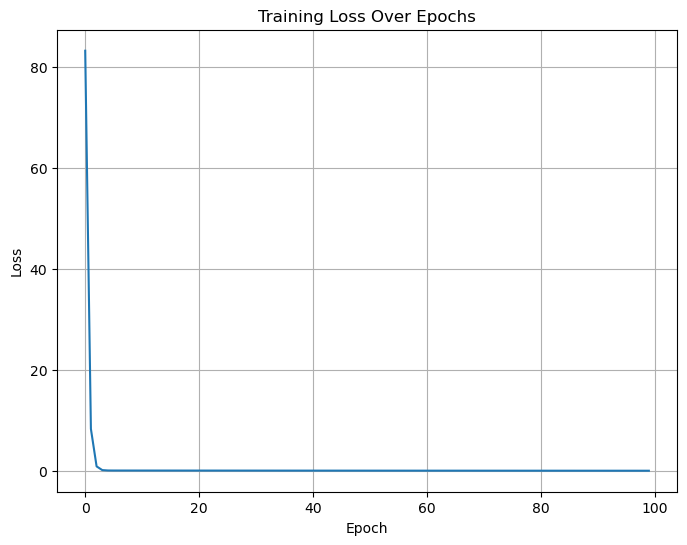

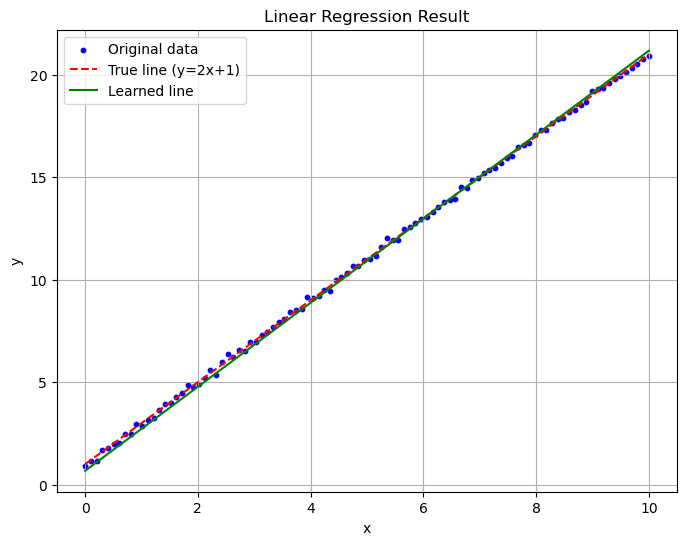

In [9]:
# Print learned parameters
learned_weight = model.linear.weight.item()
learned_bias = model.linear.bias.item()
print(f"\nLearned equation: y = {learned_weight:.4f}x + {learned_bias:.4f}")

# Plot the training loss
plt.figure(figsize=(8,6))
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

# Visualize the learned line
model.eval() # Set the model to evaluation mode (important for some layers like dropout, batchnorm)
with torch.no_grad(): # Disable gradient calculation for inference
    predicted_line = model(x_tensor).detach().numpy() # Get predictions and convert to numpy

plt.figure(figsize=(8, 6))
plt.scatter(x_numpy, y_numpy, label='Original data', color='blue', s=10)
plt.plot(x_numpy, 2 * x_numpy + 1, label='True line (y=2x+1)', color='red', linestyle='--')
plt.plot(x_numpy, predicted_line, label='Learned line', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Result')
plt.legend()
plt.grid(True)
plt.show()

### 1.8 PyTorch Practice Variation: Different Optimizer and Loss Function

The original example uses Stochastic Gradient Descent (`SGD`) as the optimizer and Mean Squared Error (`MSELoss`) as the loss function. Let's try changing these:

-   **Optimizer**: We can use `Adam` (Adaptive Moment Estimation), which is often a good default optimizer and can converge faster or achieve better results than SGD for some problems. It adapts the learning rate for each parameter.
-   **Loss Function**: We can use `L1Loss` (Mean Absolute Error or MAE). Instead of squaring the differences between predicted and actual values, `L1Loss` takes the absolute difference. This can make the model less sensitive to outliers compared to `MSELoss`.

We'll repeat the process with these changes.

Training with Adam optimizer and L1Loss:

Epoch [20/100], Loss (L1): 7.7047
Epoch [40/100], Loss (L1): 6.5047
Epoch [60/100], Loss (L1): 5.3047
Epoch [80/100], Loss (L1): 4.1047
Epoch [100/100], Loss (L1): 2.9055

Learned equation (variation): y = 1.4528x + 0.8925


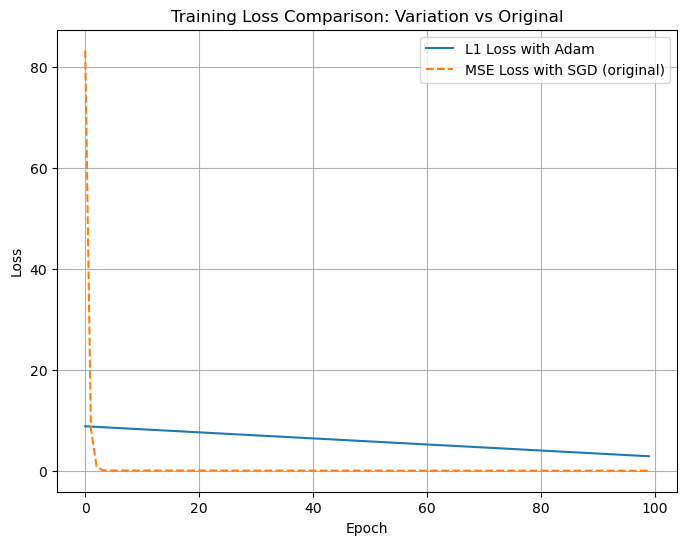

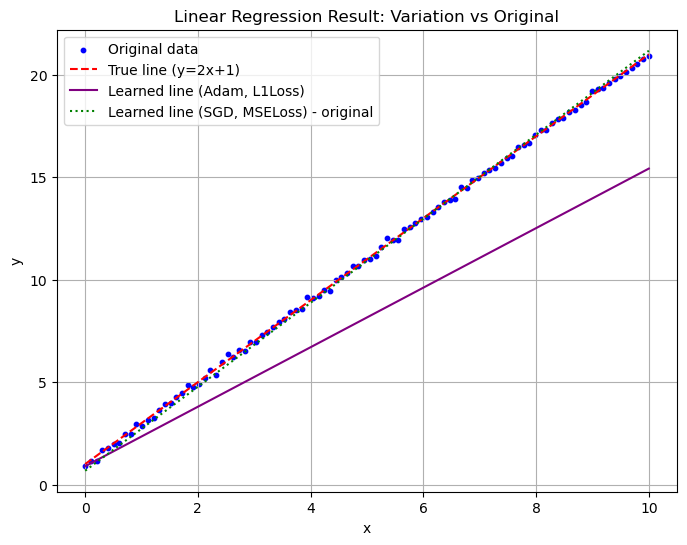

In [10]:
# Re-initialize model (to reset learned parameters)
model_variation = LinearRegressionModel()

# Variation: Use Adam optimizer and L1Loss
criterion_variation = nn.L1Loss()  # Mean Absolute Error
optimizer_variation = torch.optim.Adam(model_variation.parameters(), lr=0.01) # Adam optimizer

print("Training with Adam optimizer and L1Loss:\n")
losses_variation = []

# Training loop for the variation
for epoch in range(epochs): # Using the same number of epochs
    y_pred_variation = model_variation(x_tensor)
    loss_variation = criterion_variation(y_pred_variation, y_tensor)
    losses_variation.append(loss_variation.item())
    
    optimizer_variation.zero_grad()
    loss_variation.backward()
    optimizer_variation.step()
      
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss (L1): {loss_variation.item():.4f}")

# Print learned parameters for the variation
learned_weight_var = model_variation.linear.weight.item()
learned_bias_var = model_variation.linear.bias.item()
print(f"\nLearned equation (variation): y = {learned_weight_var:.4f}x + {learned_bias_var:.4f}")

# Plot the training loss for the variation
plt.figure(figsize=(8,6))
plt.plot(range(epochs), losses_variation, label='L1 Loss with Adam')
plt.plot(range(epochs), losses, label='MSE Loss with SGD (original)', linestyle='--') # Plot original for comparison
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison: Variation vs Original')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the learned line for the variation
model_variation.eval()
with torch.no_grad():
    predicted_line_var = model_variation(x_tensor).detach().numpy()

plt.figure(figsize=(8, 6))
plt.scatter(x_numpy, y_numpy, label='Original data', color='blue', s=10)
plt.plot(x_numpy, 2 * x_numpy + 1, label='True line (y=2x+1)', color='red', linestyle='--')
plt.plot(x_numpy, predicted_line_var, label='Learned line (Adam, L1Loss)', color='purple')
plt.plot(x_numpy, predicted_line, label='Learned line (SGD, MSELoss) - original', color='green', linestyle=':')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Result: Variation vs Original')
plt.legend()
plt.grid(True)
plt.show()

You can observe how the choice of optimizer and loss function might affect the training process (e.g., speed of convergence, final loss value) and the resulting learned parameters. Adam often converges faster than basic SGD.

## 2. TensorFlow Example: Simple Neural Network for Classification

This example uses TensorFlow with its Keras API to create a simple neural network for binary classification. Classification means assigning input data to one of several categories. Binary classification means there are only two categories (e.g., yes/no, spam/not-spam).

We'll use synthetic (artificially generated) data for this task.

### 2.1 Importing Libraries

-   `tensorflow` as `tf`: The main TensorFlow library.
-   `numpy`: For numerical operations, though TensorFlow has its own tensor operations too.
-   `sklearn.datasets.make_classification`: A utility from Scikit-learn to generate a random n-class classification problem. This is great for quickly creating data to test models.
-   `sklearn.model_selection.train_test_split`: A utility to split data into training and testing sets. We train the model on the training set and then evaluate its performance on the unseen testing set.

In [11]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For feature scaling

### 2.2 Generating Synthetic Classification Data

-   `make_classification(...)`: Generates the data.
    -   `n_samples=1000`: We want 1000 data points (samples).
    -   `n_features=4`: Each sample will have 4 input features.
    -   `n_classes=2`: There are 2 output classes (binary classification).
    -   `random_state=42`: Ensures that we get the same random data every time we run the code, making results reproducible. `42` is just a commonly used number.
-   `X` will contain the features (our input data), and `y` will contain the corresponding class labels (0 or 1).
-   `train_test_split(X, y, test_size=0.2, random_state=42)`: Splits the data. 
    -   `test_size=0.2`: Reserves 20% of the data for the test set, and the remaining 80% for the training set.

**Feature Scaling**:
It's often good practice to scale input features, especially for neural networks. This helps the optimizer work more effectively. We'll use `StandardScaler` from Scikit-learn, which standardizes features by removing the mean and scaling to unit variance.

In [12]:
# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit on training data and transform it
X_test = scaler.transform(X_test)     # Transform test data using the same scaler

print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")
print(f"First 5 samples of X_train (scaled):\n{X_train[:5]}")
print(f"First 5 labels of y_train:\n{y_train[:5]}")

Shape of X_train: (800, 4), Shape of y_train: (800,)
Shape of X_test: (200, 4), Shape of y_test: (200,)
First 5 samples of X_train (scaled):
[[ 0.32129268  0.586202   -0.10387867  0.64127933]
 [ 2.22462754 -0.33109131 -0.23558958 -1.94440732]
 [-1.10234414  1.03056246  2.0148836  -0.82084143]
 [ 0.65795258 -0.80020736 -0.08606385  0.62780237]
 [ 0.08785083  0.16532588 -1.17995002  0.89207167]]
First 5 labels of y_train:
[1 1 0 1 1]


### 2.3 Defining the Neural Network Model

We use Keras's `Sequential` API, which is a straightforward way to build models by stacking layers one after the other.

-   `tf.keras.Sequential([...])`: Creates a sequential model.
-   `tf.keras.layers.Dense(16, activation='relu', input_shape=(4,))`: The first hidden layer.
    -   `Dense`: A fully connected layer, meaning each neuron in this layer is connected to every neuron in the previous layer (or input).
    -   `16`: The number of neurons (or units) in this layer.
    -   `activation='relu'`: The activation function. 'ReLU' (Rectified Linear Unit) is a common choice for hidden layers. It outputs the input directly if it's positive, otherwise, it outputs zero.
    -   `input_shape=(4,)`: Specifies the shape of the input for the first layer only. Our data has 4 features.
-   `tf.keras.layers.Dense(8, activation='relu')`: The second hidden layer with 8 neurons and ReLU activation.
-   `tf.keras.layers.Dense(1, activation='sigmoid')`: The output layer.
    -   `1`: One neuron because this is binary classification (it will output a single value between 0 and 1).
    -   `activation='sigmoid'`: The sigmoid activation function squashes the output to a range between 0 and 1. This can be interpreted as the probability of belonging to class 1. For multi-class classification, you'd typically use `softmax`.

In [13]:
# Define a simple neural network
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # Input shape from X_train
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Display the model's architecture
model_tf.summary()

/home/max/miniconda3/envs/classification_models_py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

### 2.4 Compiling the Model

Before training, we need to configure the learning process using the `compile` method.

-   `optimizer='adam'`: Specifies the optimizer. 'Adam' is another popular and effective optimization algorithm.
-   `loss='binary_crossentropy'`: Specifies the loss function. `binary_crossentropy` is suitable for binary classification problems where the output is a probability (due to the sigmoid activation in the last layer).
-   `metrics=['accuracy']`: Specifies metrics to monitor during training and evaluation. Here, we want to see the 'accuracy' (the proportion of correctly classified samples).

In [14]:
# Compile the model
model_tf.compile(optimizer='adam', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

### 2.5 Training the Model

Now we train the model using the `fit` method.

-   `X_train, y_train`: The training data (features and labels).
-   `epochs=10`: The number of times the model will see the entire training dataset.
-   `batch_size=32`: The number of samples processed before the model's parameters are updated. The training data is divided into batches.
-   `validation_split=0.2`: Reserves 20% of the *training data* to be used as validation data. The model's performance on this validation data is monitored during training, which can help detect overfitting (when the model performs well on training data but poorly on unseen data).
-   `verbose=1`: How much information to display during training (1 usually means a progress bar and metrics per epoch).

In [15]:
# Train the model
print("\nTraining the TensorFlow model...")
history = model_tf.fit(X_train, y_train, 
                         epochs=10, 
                         batch_size=32, 
                         validation_split=0.2, # Use part of training data for validation
                         verbose=1)


Training the TensorFlow model...
Epoch 1/10


I0000 00:00:1747957910.114525   45340 service.cc:148] XLA service 0x7f6a940055a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747957910.114541   45340 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1747957910.114543   45340 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-05-22 19:51:50.142937: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747957910.224706   45340 cuda_dnn.cc:529] Loaded cuDNN version 90800


 1/20 ━━━━━━━━━━━━━━━━━━━━ 15s 818ms/step - accuracy: 0.8438 - loss: 0.6586

I0000 00:00:1747957910.533867   45340 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7898 - loss: 0.6551 - val_accuracy: 0.8375 - val_loss: 0.6265
Epoch 2/10
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8489 - loss: 0.6145 - val_accuracy: 0.8438 - val_loss: 0.5906
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8489 - loss: 0.6145 - val_accuracy: 0.8438 - val_loss: 0.5906
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8520 - loss: 0.5757 - val_accuracy: 0.8375 - val_loss: 0.5513
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8520 - loss: 0.5757 - val_accuracy: 0.8375 - val_loss: 0.5513
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8791 - loss: 0.5276 - val_accuracy: 0.8500 - val_loss: 0.5084
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8791 - loss: 0.5276 - val_accuracy: 0.8500 - val_loss: 0.5084
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8718 - loss: 0.4773 - val_accuracy: 0.8562 - val_loss

### 2.6 Evaluating the Model

After training, we evaluate the model's performance on the test set (`X_test`, `y_test`), which it has never seen before.

-   `model.evaluate(X_test, y_test, verbose=0)`: Calculates the loss and any specified metrics (like accuracy) on the test data. `verbose=0` means it won't print progress during evaluation.


Test Loss: 0.3229
Test Accuracy: 0.8850


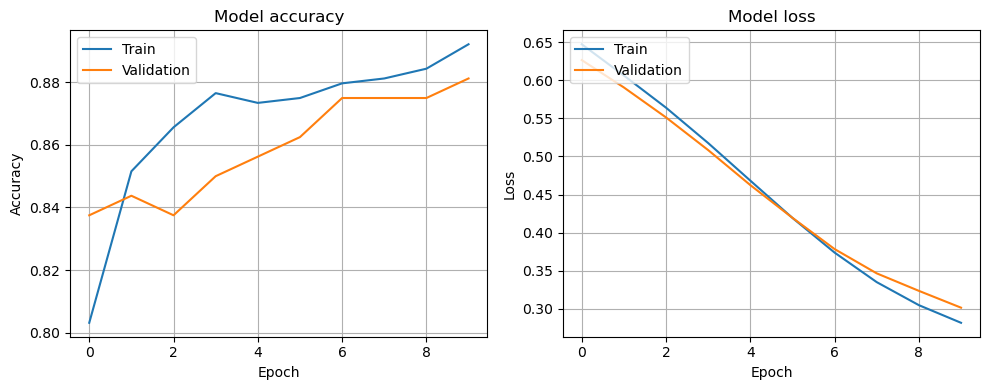

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_tf.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Accuracy/loss history not fully available for plotting.")

### 2.7 TensorFlow Practice Variation: Add Dropout Layers

**Dropout** is a regularization technique used to prevent overfitting in neural networks. Overfitting happens when a model learns the training data too well, including its noise, and performs poorly on new, unseen data.

During training, a dropout layer randomly sets a fraction of input units to 0 at each update. This helps to make the network more robust and prevents neurons from co-adapting too much.

-   `tf.keras.layers.Dropout(0.2)`: Adds a dropout layer. `0.2` means that 20% of the input units will be randomly set to 0 during each update in the training phase. Dropout is only active during training, not during evaluation or inference.

Let's modify our model to include dropout layers after each Dense hidden layer.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)


Training the TensorFlow model with Dropout...
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4356 - loss: 0.8064 - val_accuracy: 0.5125 - val_loss: 0.7199
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4356 - loss: 0.8064 - val_accuracy: 0.5125 - val_loss: 0.7199
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5383 - loss: 0.7136 - val_accuracy: 0.7688 - val_loss: 0.6582
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5383 - loss: 0.7136 - val_accuracy: 0.7688 - val_loss: 0.6582
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6174 - loss: 0.6691 - val_accuracy: 0.8188 - val_loss: 0.6092
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6174 - loss: 0.6691 - val_accuracy: 0.8188 - val_loss: 0.6092
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6577 - loss: 0.6282 - val_accuracy: 0.8375 - val_loss: 0.5679
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6577 

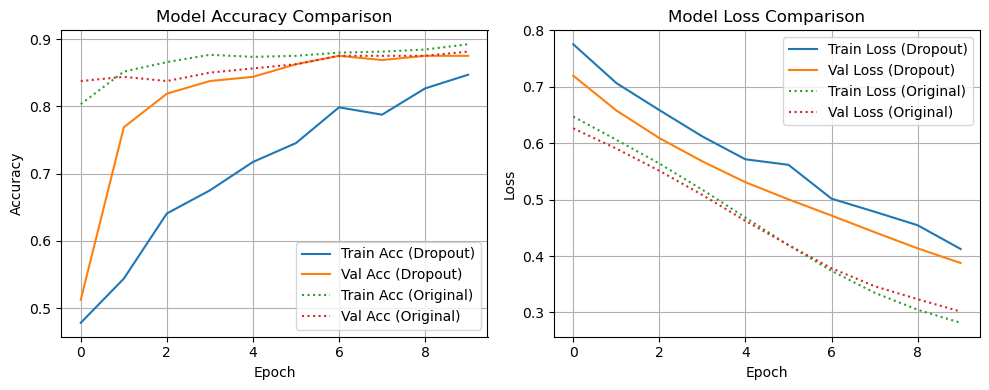

In [17]:
# Define a neural network with Dropout layers
model_tf_variation = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Dropout layer after the first Dense layer (30% dropout rate)
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer after the second Dense layer (20% dropout rate)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Display the new model's architecture
model_tf_variation.summary()

# Compile the variation model
model_tf_variation.compile(optimizer='adam', 
                           loss='binary_crossentropy', 
                           metrics=['accuracy'])

# Train the variation model
print("\nTraining the TensorFlow model with Dropout...")
history_variation = model_tf_variation.fit(X_train, y_train, 
                                           epochs=10, # Using fewer epochs to see effect quickly, can increase
                                           batch_size=32, 
                                           validation_split=0.2, 
                                           verbose=1)

# Evaluate the variation model
test_loss_var, test_accuracy_var = model_tf_variation.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss (Variation with Dropout): {test_loss_var:.4f}")
print(f"Test Accuracy (Variation with Dropout): {test_accuracy_var:.4f}")

# Plot training & validation accuracy and loss for the variation model
if 'accuracy' in history_variation.history and 'val_accuracy' in history_variation.history:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history_variation.history['accuracy'], label='Train Acc (Dropout)')
    plt.plot(history_variation.history['val_accuracy'], label='Val Acc (Dropout)')
    if 'accuracy' in history.history: # Original model's history
        plt.plot(history.history['accuracy'], label='Train Acc (Original)', linestyle=':')
        plt.plot(history.history['val_accuracy'], label='Val Acc (Original)', linestyle=':')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_variation.history['loss'], label='Train Loss (Dropout)')
    plt.plot(history_variation.history['val_loss'], label='Val Loss (Dropout)')
    if 'loss' in history.history: # Original model's history
        plt.plot(history.history['loss'], label='Train Loss (Original)', linestyle=':')
        plt.plot(history.history['val_loss'], label='Val Loss (Original)', linestyle=':')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Accuracy/loss history for variation model not fully available for plotting.")

With dropout, you might see that the training accuracy is a bit lower or increases slower, but the validation accuracy might be better or the gap between training and validation accuracy might be smaller, indicating less overfitting. The effect of dropout is usually more pronounced on more complex models and datasets where overfitting is a bigger risk.

## 3. OpenAI API Example: Ask GPT-4o a Static Question

This example shows how to use the OpenAI API to send a question to the GPT-4o model and get a response. This involves making an HTTP request to OpenAI's servers.

**Important Note**: To run this example, you need an OpenAI API key. 
1.  If you don't have one, sign up at [OpenAI's website](https://platform.openai.com/).
2.  Replace `'YOUR_API_KEY'` in the code below with your actual API key.
3.  **Keep your API key secret!** Do not share it publicly or commit it to version control.

You will also need an active internet connection.

### 3.1 Importing the OpenAI Library

-   `openai`: The official Python library for interacting with the OpenAI API.

In [ ]:
# We need to install the openai library if you haven't already: !pip install openai
import openai
from openai import OpenAI # Recommended way to import client
import os # To potentially use environment variables for API key

### 3.2 Initializing the OpenAI Client

We create an instance of the `OpenAI` client, providing our API key.

**Security Best Practice**: It's better to store your API key as an environment variable rather than hardcoding it. 
For example, you could set an environment variable `OPENAI_API_KEY` and then use `api_key=os.environ.get('OPENAI_API_KEY')`.
For simplicity in this example, we'll show the direct replacement method, but **be mindful of security**.

In [ ]:
# --- IMPORTANT: REPLACE 'YOUR_API_KEY' WITH YOUR ACTUAL KEY --- 
# api_key_value = "YOUR_API_KEY" 
# For safety, it's better to use an environment variable or input prompt:
try:
    # Attempt to get API key from environment variable first
    api_key_value = os.environ["OPENAI_API_KEY"]
    if not api_key_value:
        raise KeyError
    print("Using API key from environment variable OPENAI_API_KEY.")
except KeyError:
    print("OPENAI_API_KEY environment variable not found.")
    # Fallback: prompt user for API key if not in environment
    # In a real notebook, you might use input() but be careful with visibility
    api_key_value = "YOUR_API_KEY_PLACEHOLDER" # Replace this or use input()
    if api_key_value == "YOUR_API_KEY_PLACEHOLDER":
         print("Please replace 'YOUR_API_KEY_PLACEHOLDER' with your actual key or set the OPENAI_API_KEY environment variable.")
         # You might want to raise an error or skip this section if no key is provided
         # For now, we'll let it proceed, but it will fail if the key is invalid.

client = None
if api_key_value and api_key_value != "YOUR_API_KEY_PLACEHOLDER":
    try:
        client = OpenAI(api_key=api_key_value)
        print("OpenAI client initialized.")
    except Exception as e:
        print(f"Error initializing OpenAI client: {e}")
else:
    print("OpenAI client NOT initialized. Please provide a valid API key.")

### 3.3 Defining the Question and Making the API Request

-   `question`: The question we want to ask the model.
-   `client.chat.completions.create(...)`: This is the method used to interact with chat-based models like GPT-3.5-turbo, GPT-4, and GPT-4o.
    -   `model="gpt-4o"`: Specifies which model to use. "gpt-4o" is OpenAI's latest flagship model (as of this writing).
    -   `messages=[...]`: A list of message objects that form the conversation history.
        -   `{"role": "system", "content": "You are a helpful assistant."}`: The system message sets the context or behavior for the assistant.
        -   `{"role": "user", "content": question}`: The user's message (our question).
    -   `max_tokens=50`: Limits the maximum length of the generated response. One token is roughly 4 characters of text for English.
    -   `temperature=0.7`: Controls the randomness of the output. 
        -   Higher values (e.g., 0.7-1.0) make the output more random and creative.
        -   Lower values (e.g., 0.1-0.3) make it more focused and deterministic.
        -   A value of 0 would make it mostly deterministic, but not always perfectly so.

In [ ]:
if client: # Only proceed if client was initialized
    # Define a static question
    question = "What is the capital city of France?"

    try:
        # Make a request to GPT-4o
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are a concise and helpful assistant."},
                {"role": "user", "content": question}
            ],
            max_tokens=50, # Maximum number of tokens in the response
            temperature=0.7  # Controls randomness: 0.0 (deterministic) to 2.0 (very random)
        )

        # Extract and print the response
        # The response structure is a choice object, we need to access the message content
        answer = response.choices[0].message.content
        print(f"\nQuestion: {question}")
        print(f"Answer: {answer.strip()}") # .strip() removes leading/trailing whitespace

    except openai.APIConnectionError as e:
        print(f"OpenAI API request failed to connect: {e}")
    except openai.RateLimitError as e:
        print(f"OpenAI API request exceeded rate limit: {e}")
    except openai.AuthenticationError as e:
        print(f"OpenAI API authentication failed. Check your API key: {e}")
    except openai.APIError as e:
        print(f"OpenAI API returned an API Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print("\nSkipping OpenAI API call as the client was not initialized (API key missing or invalid).")

### 3.4 OpenAI API Practice Variation: Different Question and Parameters

Let's try asking a different question and adjusting the `max_tokens` and `temperature` parameters to see how they affect the output.

-   **New Question**: "Explain the concept of a 'tensor' in machine learning in one sentence."
-   **`max_tokens`**: We might increase this slightly if we expect a slightly longer answer, or keep it controlled for brevity.
-   **`temperature`**: Let's try a lower temperature (e.g., 0.2) for a more deterministic, factual answer, and a higher temperature (e.g., 0.9) for a more creative (though potentially less accurate for factual questions) response.

In [ ]:
if client: # Only proceed if client was initialized
    new_question = "Explain the concept of a 'tensor' in machine learning in one or two simple sentences."

    print(f"\n--- OpenAI Variation 1: Different Question, Lower Temperature ---")
    try:
        response_var1 = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are a helpful and concise AI assistant, skilled at explaining complex topics simply."},
                {"role": "user", "content": new_question}
            ],
            max_tokens=80,  # Slightly more tokens allowed
            temperature=0.2   # Lower temperature for more focused response
        )
        answer_var1 = response_var1.choices[0].message.content
        print(f"Question: {new_question}")
        print(f"Answer (temp 0.2): {answer_var1.strip()}")
    except Exception as e:
        print(f"Error during OpenAI API call (Variation 1): {e}")

    print(f"\n--- OpenAI Variation 2: Same Question, Higher Temperature ---")
    try:
        response_var2 = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are a helpful and somewhat creative AI assistant."}, 
                {"role": "user", "content": new_question} 
            ],
            max_tokens=80,
            temperature=0.9   # Higher temperature for more creative/varied response
        )
        answer_var2 = response_var2.choices[0].message.content
        print(f"Question: {new_question}")
        print(f"Answer (temp 0.9): {answer_var2.strip()}")
    except Exception as e:
        print(f"Error during OpenAI API call (Variation 2): {e}")
else:
    print("\nSkipping OpenAI API variations as the client was not initialized.")

By changing the `temperature`, you'll likely get different phrasings or slightly different explanations for the same question. Lower temperatures are good for factual recall, while higher temperatures can be used for more generative or brainstorming tasks (but be cautious about factual accuracy at very high temperatures).

## Conclusion and Further Learning

These examples provide a basic introduction to using PyTorch, TensorFlow, and the OpenAI API for common machine learning tasks. 

**Key Takeaways for Learning & Interviews:**

* **Understand the Core Concepts:**
    * **PyTorch**: Tensors, `nn.Module` for model building, autograd for gradients, optimizers, and the training loop structure.
    * **TensorFlow (Keras)**: The `Sequential` or Functional API for model building, layers, compilation (optimizer, loss, metrics), and the `fit`/`evaluate` workflow.
    * **OpenAI API**: Client initialization, structuring messages for chat completions, understanding parameters like `model`, `temperature`, and `max_tokens`, and how to parse the response.
* **Practice Explaining Code**: Be able to walk through each part of the code and explain *why* certain choices were made (e.g., why use `relu` vs `sigmoid`, why `binary_crossentropy` for this problem).
* **Experiment with Variations**: Actively try modifying these examples. Change architectures, try different optimizers/loss functions, explore other datasets, or ask more complex questions to the OpenAI API. This is the best way to solidify your understanding.
* **Setup and Dependencies**: Know how to install the necessary libraries (`pip install ...`) and be aware of potential environment issues (e.g., Python versions, CUDA for GPU).
* **Error Handling**: For API calls (like OpenAI), understand common errors (authentication, rate limits, connection issues) and how you might handle them in a real application.

This notebook is just a starting point. The field of ML is vast and constantly evolving. Continue exploring documentation, tutorials, and building your own projects to deepen your knowledge!